In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
tt=0.02
h=0.02
hh=0.02
a=0
b=1
c=2
x=np.arange(a,b+h,h)
y=np.arange(a,b+hh,hh)
xgrid,ygrid=np.meshgrid(x,y) 
uu=lambda t:1+xgrid*ygrid+np.cos((np.pi*xgrid)/2)*np.sin((np.pi*ygrid)/2)*(np.exp(t)-np.exp(-np.pi*np.pi*t))/(1+np.pi*np.pi)
stt=int((b-a)/tt)+1 
sx=int((b-a)/h)+1 
sy=int((b-a)/hh)+1
tr1=c*tt/(2*h**2)
tr2=c*tt/(2*hh**2)
uy1=lambda x:1 
ut=lambda x,y:1+x*y 
uy2=lambda t,x:1+x+np.cos((np.pi*x)/2)*(np.exp(t)-np.exp(-np.pi*np.pi*t))/(1+np.pi*np.pi) 
ux1=lambda t,y:1+np.sin((np.pi*y)/2)*(np.exp(t)-np.exp(-np.pi*np.pi*t))/(1+np.pi*np.pi) 
ux2=lambda y:1+y 
pr=lambda t,x,y:np.exp(t)*np.cos((np.pi*x)/2)*np.sin((np.pi*y)/2)
p=np.zeros(sx)
o=np.zeros(sx)
pp=np.zeros(sy)
oo=np.zeros(sy)
u=np.zeros((2*stt,sy,sx))

for i in range(sy):
    for j in range(sx):
        u[0,i,j]=ut(j*h,i*hh) 
for i in range(2*stt):
    for j in range(sx):
        u[i,0,j]=uy1(0) 
        u[i,sy-1,j]=uy2(i*tt/2,j*h) 
    for j in range(sy):
        u[i,j,0]=ux1(i*tt/2,j*hh) 
        u[i,j,sx-1]=ux2(j*hh) 

for k in range(2,2*stt,2):
    for j in range(1,sy-1):
        o[1]=u[k-1][j][0] 
        for i in range(2,sx-1):
            p[i]=tr1/(-tr1*p[i-1]+(1+2*tr1))
            q=tr2*(u[k-2][j-1][i-1]+u[k-2][j+1][i-1])+(1-2*tr2)*u[k-2][j][i-1]+pr((k-2)/(2*stt),j/sy,(i-1)/sx)*tt/4
            o[i]=(q+tr1*o[i-1])/(-tr1*p[i-1]+(1+2*tr1))
        q1=u[k-1][j][sx-1]+pr((k-1)/(2*stt),j/sy,1)*tt/4 
        for i in range (sx-2,0,-1):
            q2=tr2*(u[k-2][j-1][i]+u[k-2][j+1][i])+(1-2*tr2)*u[k-2][j][i]+pr((k-2)/(2*stt),j/sy,i/sx)*tt/4
            u[k-1][j][i]=(q2+tr1*o[i]+tr1*u[k-1][j][i+1])/(-tr1*p[i]+(1+2*tr1))
    for j in range(1,sx-1):
        oo[1]=u[k][0][j] 
        for i in range(2,sy-1):
            pp[i]=tr2/(-tr2*pp[i-1]+(1+2*tr2))
            q=tr1*(u[k-1][i-1][j-1]+u[k-1][i-1][j+1])+(1-2*tr1)*u[k-1][i-1][j]+pr((k-1)/(2*stt),(i-1)/sy,(j)/sx)*tt/4
            oo[i]=(q+tr2*oo[i-1])/(-tr2*pp[i-1]+(1+2*tr2))
        q1=u[k][sy-1][j]+pr((k)/(2*stt),1,j/sx)*tt/4 
        for i in range (sy-2,0,-1):
            q2=tr1*(u[k-1][i][j-1]+u[k-1][i][j+1])+(1-2*tr1)*u[k-1][i][j]+pr((k-1)/(2*stt),i/sy,j/sx)*tt/4
            u[k][i][j]=(q2+tr2*oo[i]+tr2*u[k][i+1][j])/(-tr2*pp[i]+(1+2*tr2))


def plot(t):
    fig=pylab.figure()
    axes=Axes3D(fig)
    axes.plot_surface(xgrid,ygrid,uu(t))
    pylab.xlabel("x")
    pylab.ylabel("y")
    title="Exact solution, t="+str(t)
    pylab.title(title)
    pylab.show()

    fig=pylab.figure()
    axes=Axes3D(fig)
    axes.plot_surface(xgrid,ygrid,(u[int(t*(stt-1)*2),:,:]))
    pylab.xlabel("x")
    pylab.ylabel("y")
    title="ADI method, t="+str(t)
    pylab.title(title)
    pylab.show()

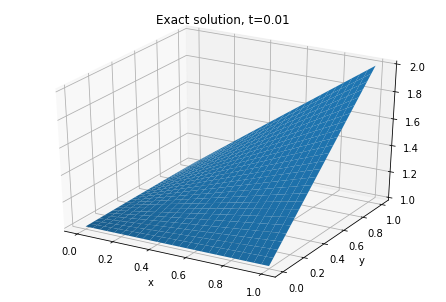

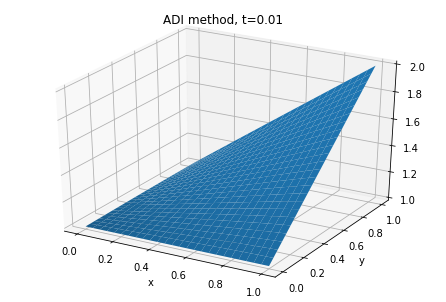

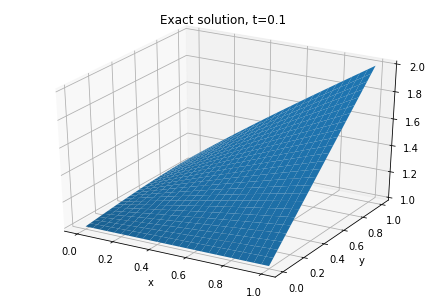

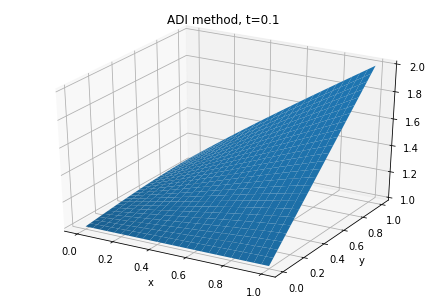

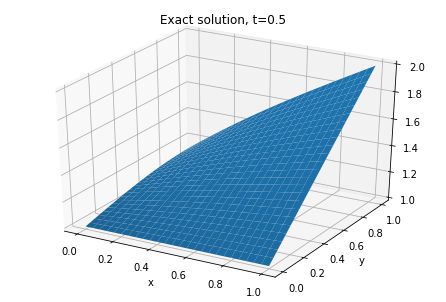

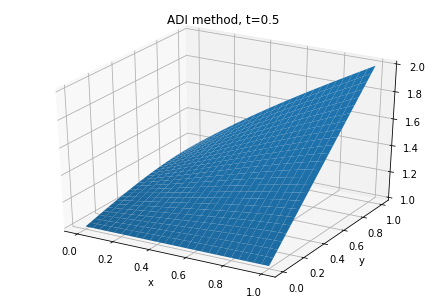

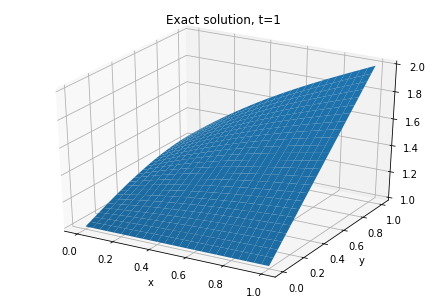

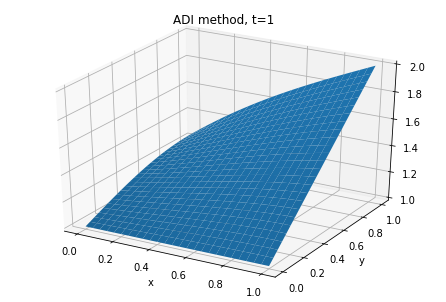

In [ ]:
plot(0.01)
plot(0.1)
plot(0.5)
plot(1)
